## Monty Hall Problem using Relative Frequency Approach

* Generate Random samples

###### Import libraries

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

###### Constants 

In [24]:
NO_OF_DOORS = 3
TRAILS = 10000

###### Build a gift behind one of the doors

In [27]:
def build_gift():
    return random.randint(1,NO_OF_DOORS)

###### Choose a random door

In [5]:
def choose_door():
    return random.randint(1,NO_OF_DOORS)

###### Open a door other than the chosen & gift door

In [25]:
def open_door(doors,chosen,gift_pos):
    available_doors = [x for x in doors if x != chosen and x != gift_pos]
    return random.choice(available_doors)

###### Decision after opening one of the door.

In [7]:
def alter_or_stay():
    return random.randint(0,1)

###### Play a game
 * Build a door with gift 
 * Ask Participant to choose a door
 * Open a door other than the chosen one and gift door
 * Ask Participant whether he or she interested in changing the decision
 * Produce final result

In [26]:
def play_game(doors):
    
    gift_pos = build_gift()
    chosen = choose_door()
    opened = open_door(doors,chosen,gift_pos)
    doors.remove(opened)
    decision = alter_or_stay()
    if decision:
        doors.remove(chosen)
        chosen = doors[0]
    return decision,int(chosen == gift_pos)

###### Run trails & calculate the winning % after each trail

In [22]:
def run_trails(trails=TRAILS):
    
    doors = list(range(1,NO_OF_DOORS+1))
    alter_results = {}
    stay_results = {}
    alter_won = 0
    stay_won = 0
    alter_count = 0
    stay_count = 0
    for trail in range(1,trails+1):
        decision,status = play_game(doors[:])
        if decision:
            alter_count += 1
            if status:
                alter_won += 1
                
            alter_results[alter_count] = [(alter_won/alter_count)*100]
        if not decision:
            stay_count += 1
            if status:
                stay_won += 1
            stay_results[stay_count] = [(stay_won/stay_count)*100]
        
    print (f"{(alter_won/alter_count)*100:2.2f} {(stay_won/stay_count)*100:2.2f}")
    return alter_results,stay_results

##### Run 10000 trails

In [23]:
alter_results,stay_results = run_trails(trails=10000)

67.13 34.15


In [28]:
alter_trails_df = pd.DataFrame.from_dict(alter_results,orient='index').reset_index()
alter_trails_df.columns = ['trail','alter_prob']

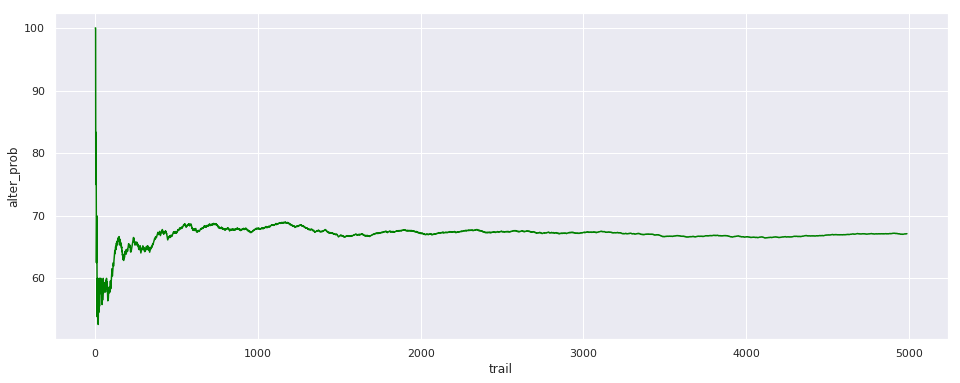

In [29]:
plt.figure(figsize=(16, 6))
ax_ps = sns.lineplot(x="trail", y="alter_prob", color="green",data=alter_trails_df)

In [32]:
stay_trails_df = pd.DataFrame.from_dict(stay_results,orient='index').reset_index()
stay_trails_df.columns = ['trail','stay_prob']

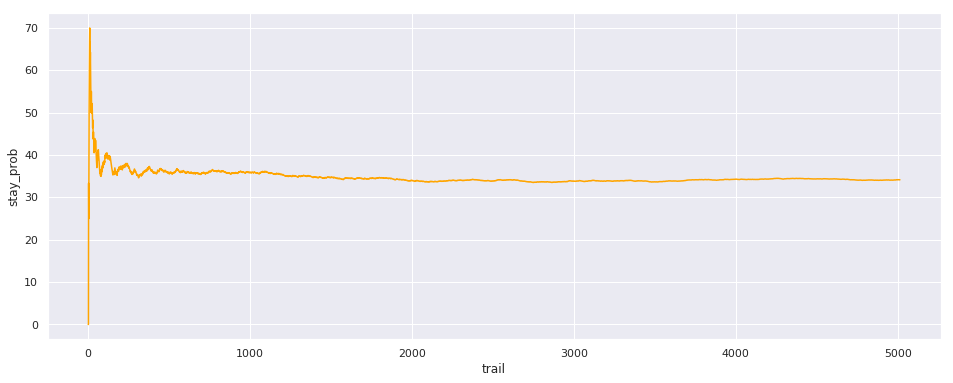

In [33]:
plt.figure(figsize=(16, 6))
ax_pns = sns.lineplot(x="trail", y="stay_prob", color="orange",data=stay_trails_df)